In [13]:
%run 'transformer.py'
%run 'subsampler.py'
%run 'visualisation.py'

class Transformer and Event successfully imported


In [14]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
%store -r association_table

In [16]:
association_table.sample(3)

,Index,Event,Duration,Event start,Event stop,File name,File start,File end,Sampling rate,Overlap,Unnamed: 10,Unnamed: 11,Unnamed: 12,npts,energy,path
32806,32806,LP1,22,2006-09-28 14:03:57.700000+00:00,2006-09-28 14:04:19.700000+00:00,20060928_1416.UB1.SL.Z.sac,2006-09-28 14:00:00.019000+00:00,2006-09-28 14:59:59.969000+00:00,40.0,False,NaN,NaN,NaN,143999.0,0.02771,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...
45474,45474,LP1,46,2007-10-01 15:00:08.490000+00:00,2007-10-01 15:00:54.490000+00:00,20071001_1500.UB1.SL.Z.sac,2007-10-01 15:00:00.039000+00:00,2007-10-01 16:00:00.039000+00:00,50.0,False,NaN,NaN,NaN,180001.0,0.03492,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...
122993,122993,LP1,28,2011-03-28 16:41:55.710000+00:00,2011-03-28 16:42:23.710000+00:00,20110328_1600.UB1.SL.Z.sac,2011-03-28 15:59:59.795000+00:00,2011-03-28 17:00:08.705000+00:00,100.0,False,NaN,NaN,NaN,360892.0,1.14098,C:/Users/EC265595/Documents/Data/Ubinas_2006_2...


# Preprocessing

In [17]:
data = association_table.copy()

In [18]:
data['event'] = data.Event.apply(event_class)

In [19]:
data_ts = data[['event', 'Event start']]

In [20]:
data_ts.loc[:,'Event start'] = pd.to_datetime(data_ts.loc[:,'Event start'])

/home/d5learner-15/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [21]:
data_ts.dtypes

event                       object
Event start    datetime64[ns, UTC]
dtype: object

# Différence entre les Event start

In [22]:
def diff_datetime(df):
    for idx in df.reset_index().index[1:]:
        df.loc[idx,'diff']= data_ts.loc[idx,'Event start'] - data_ts.loc[idx-1,'Event start']
    return df

In [23]:
data_LP = data_ts[data_ts.event == 'LP']
data_TR = data_ts[data_ts.event == 'TR']
data_EXP = data_ts[data_ts.event == 'EXP']
data_VT = data_ts[data_ts.event == 'VT']
data_HIB = data_ts[data_ts.event == 'HIB']
data_PIS = data_ts[data_ts.event == 'PIS']
data_TOR = data_ts[data_ts.event == 'TOR']

# data_LP

In [24]:
# on trie par date
data_LP.sort_values(by='Event start', inplace=True)

<ipython-input-24-e99cd0f23180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LP.sort_values(by='Event start', inplace=True)


In [26]:
# diff_datetime(data_LP)
data_LP['diff'] = data_LP['Event start'].diff(1)

<ipython-input-26-69a451940756>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LP['diff'] = data_LP['Event start'].diff(1)


In [27]:
data_LP

,event,Event start,diff
4223,LP,2006-01-06 01:17:26.980000+00:00,NaT
4224,LP,2006-01-06 01:20:39.720000+00:00,0 days 00:03:12.740000
4225,LP,2006-01-06 01:38:08.070000+00:00,0 days 00:17:28.350000
4226,LP,2006-01-06 01:42:51.480000+00:00,0 days 00:04:43.410000
4228,LP,2006-01-06 02:12:48.880000+00:00,0 days 00:29:57.400000
...,...,...,...
31696,LP,NaT,NaT
43506,LP,NaT,NaT
45453,LP,NaT,NaT
75534,LP,NaT,NaT


In [28]:
data_LP.diff = pd.to_timedelta(data_ts.diff, unit='hour', errors='ignore')

In [30]:
data_LP['minutes'] = data_LP['diff'].dt.total_seconds()/60

<ipython-input-30-f80b4cdcac2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LP['minutes'] = data_LP['diff'].dt.total_seconds()/60


In [31]:
data_LP['seconds'] = data_LP['diff'].dt.seconds

<ipython-input-31-71f357bab2d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_LP['seconds'] = data_LP['diff'].dt.seconds


<AxesSubplot:xlabel='Event start'>

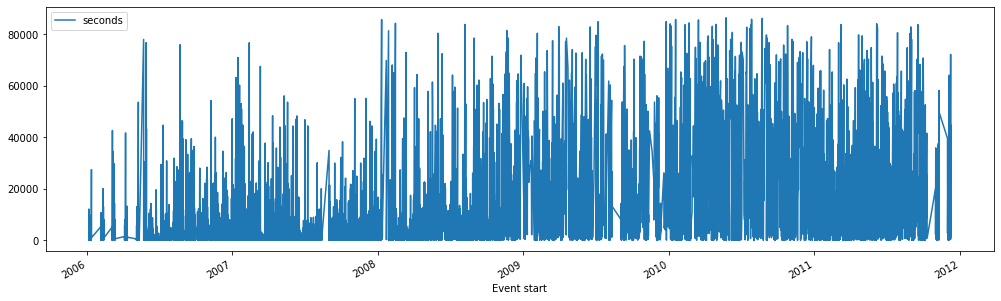

In [35]:
data_LP[['Event start', 'seconds']].plot(x='Event start', y='seconds', figsize=(17,5))#, marker='.', linestyle='')

<AxesSubplot:xlabel='Event start'>

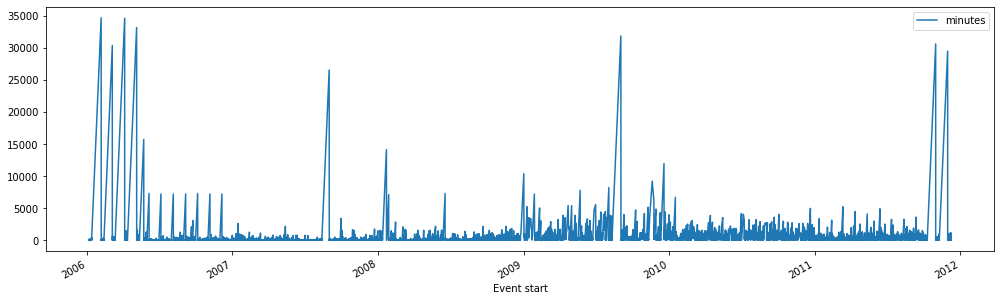

In [36]:
data_LP[['Event start', 'minutes']].plot(x='Event start', y='minutes', figsize=(17,5))#, marker='.', linestyle='')

In [34]:
data_LP

,event,Event start,diff,minutes,seconds
4223,LP,2006-01-06 01:17:26.980000+00:00,NaT,NaN,NaN
4224,LP,2006-01-06 01:20:39.720000+00:00,0 days 00:03:12.740000,3.212333,192.0
4225,LP,2006-01-06 01:38:08.070000+00:00,0 days 00:17:28.350000,17.472500,1048.0
4226,LP,2006-01-06 01:42:51.480000+00:00,0 days 00:04:43.410000,4.723500,283.0
4228,LP,2006-01-06 02:12:48.880000+00:00,0 days 00:29:57.400000,29.956667,1797.0
...,...,...,...,...,...
31696,LP,NaT,NaT,NaN,NaN
43506,LP,NaT,NaT,NaN,NaN
45453,LP,NaT,NaT,NaN,NaN
75534,LP,NaT,NaT,NaN,NaN
